<Axes: xlabel='Year', ylabel='Annual CO2 emissions'>

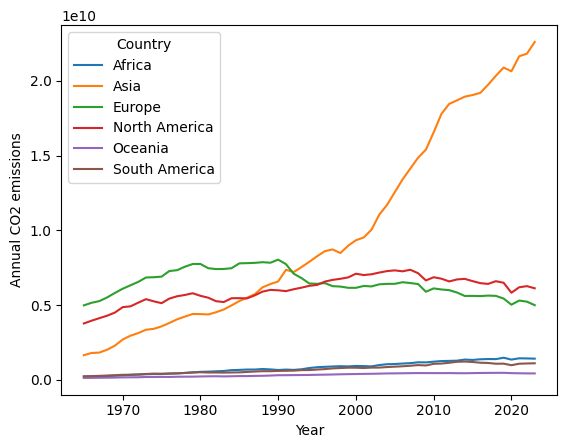

In [ ]:
import pandas as pd
import requests
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

# download the datasets
co2_df = pd.read_csv("https://ourworldindata.org/grapher/annual-co2-emissions-per-country.csv?v=1&csvType=full&useColumnShortNames=false", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

energy_df = pd.read_csv("https://ourworldindata.org/grapher/energy-consumption-by-source-and-country.csv?v=1&csvType=full&useColumnShortNames=false", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

#drop empty cells
co2_df = co2_df.dropna(axis=0, how='all')
energy_df = energy_df.dropna(axis=0, how='all')

#rename columns
co2_df.rename(columns={"Entity": 'Country', "Year": 'Year', 'Annual CO₂ emissions': 'Annual CO2 emissions'}, inplace=True)
energy_df.rename(columns={"Entity": 'Country', "Year": 'Year'}, inplace=True)

#set index
co2_df_indexed = co2_df.set_index(["Country", "Year"])
energy_df_indexed = energy_df.set_index(["Country", "Year"])

#merge
merged_df = pd.merge(co2_df_indexed, energy_df_indexed, on=["Country", "Year"], how="inner")

#print
merged_df.to_csv("CO2_Energy_Merged.csv")

#CO2 Emissions by Country

#group by regions and recent years
merged_nonindex = merged_df.reset_index()
regions = ("Asia", "Africa", "Europe", "North America", "South America", "Oceania")
regions_merged = merged_nonindex[merged_nonindex['Country'].isin(regions)]

#visualize the data
sns.lineplot(
    data = regions_merged,      
    x = 'Year',                  
    y = 'Annual CO2 emissions',   
    hue = 'Country'   
)


<Axes: xlabel='Year', ylabel='Oil consumption - TWh'>

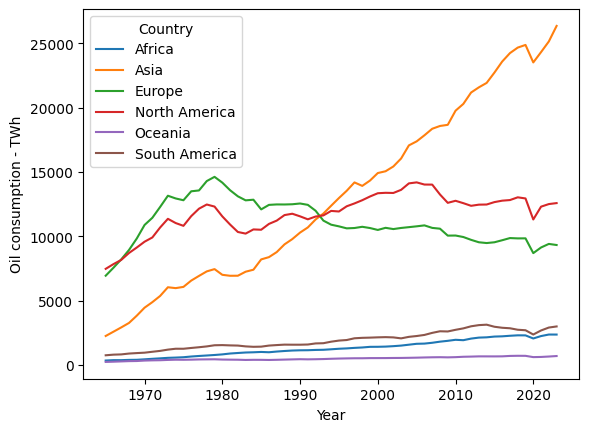

In [ ]:
#Energy Consumption by Source

#group by regions and recent years
merged_nonindex = merged_df.reset_index()
regions = ("Asia", "Africa", "Europe", "North America", "South America", "Oceania")
regions_merged = merged_nonindex[merged_nonindex['Country'].isin(regions)]

#Oil 
sns.lineplot(
    data = regions_merged,      
    x = 'Year',                  
    y = 'Oil consumption - TWh',   
    hue = 'Country'   
)

<Axes: xlabel='Year', ylabel='Coal consumption - TWh'>

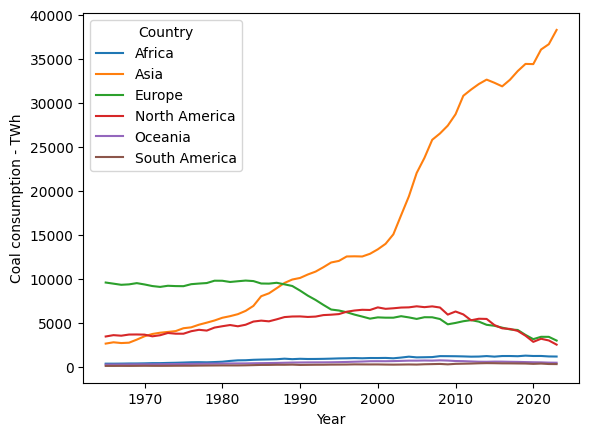

In [155]:
#Coal 
sns.lineplot(
    data = regions_merged,      
    x = 'Year',                  
    y = 'Coal consumption - TWh',   
    hue = 'Country'   
)

<Axes: xlabel='Year', ylabel='Gas consumption - TWh'>

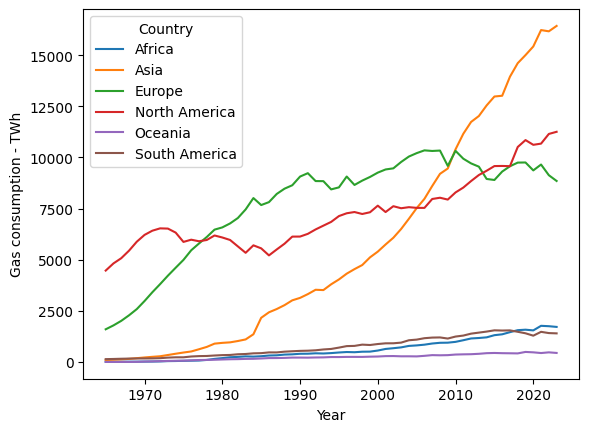

In [156]:
#Gas
sns.lineplot(
    data = regions_merged,      
    x = 'Year',                  
    y = 'Gas consumption - TWh',   
    hue = 'Country'   
)

In [ ]:
#basic descriptive statistics

columns_to_describe = ['Annual CO2 emissions', 'Other renewables (including geothermal and biomass) - TWh', 'Biofuels consumption - TWh', 'Solar consumption - TWh', 'Wind consumption - TWh', 'Hydro consumption - TWh', 'Nuclear consumption - TWh', 'Gas consumption - TWh', 'Coal consumption - TWh', 'Oil consumption - TWh'] 
print(regions_merged[columns_to_describe].describe())

       Annual CO2 emissions  \
count          3.540000e+02   
mean           4.017115e+09   
std            4.504719e+09   
min            1.294774e+08   
25%            4.900067e+08   
50%            1.564642e+09   
75%            6.401750e+09   
max            2.260022e+10   

       Other renewables (including geothermal and biomass) - TWh  \
count                                         348.000000           
mean                                          117.556169           
std                                           186.511301           
min                                             0.000000           
25%                                             8.045651           
50%                                            33.089871           
75%                                           157.979167           
max                                          1210.735600           

       Biofuels consumption - TWh  Solar consumption - TWh  \
count                  304.000000            